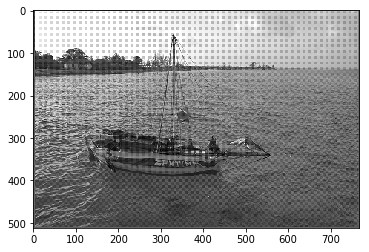

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import struct
import numpy as np
%matplotlib inline

#import mpld3
#mpld3.enable_notebook()

def readRaw(fileName):
    raw_file = open(fileName, "rb")

    width = struct.unpack('i', raw_file.read(4))[0]
    height = struct.unpack('i', raw_file.read(4))[0]

    image = np.fromfile(raw_file, dtype=np.float32)
    image = image.reshape((height, width))
    return image

image = np.fromfile("kodim06.png.bin", dtype=np.float32).reshape((512, 768)) / 255

plt.imshow(image, cmap='gray', vmin=0, vmax=1)

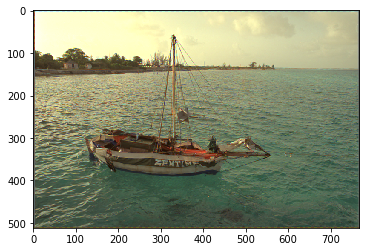

In [2]:
im_color = np.zeros(shape=(image.shape[0], image.shape[1], 3))

def getC(image, y, x):
    shape = image.shape
    zero = 0
    if len(shape) == 3:
        zero = [0, 0, 0]
    if y < 0 or x < 0:
        return zero
    if y >= shape[0] or x >= shape[1]:
        return zero
    return image[y, x]

for y in range(0, image.shape[0]):
    for x in range(0, image.shape[1]):
        if y % 2 == 0:
            if x % 2 == 0:
                # R
                im_color[y, x, 0] = getC(image, y, x)
                im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4
                im_color[y, x, 2] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4
            else:
                # G
                im_color[y, x, 0] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
        else:
            if x % 2 == 0:
                # G
                im_color[y, x, 0] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
            else:
                # B
                im_color[y, x, 0] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4
                im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4
                im_color[y, x, 2] = getC(image, y, x)

plt.imshow(im_color)

(-0.5, 767.5, 511.5, -0.5)

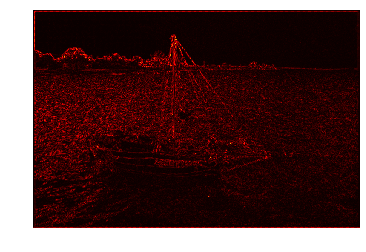

In [3]:
import cv2

imref = cv2.imread("kodim06.png")
imref = cv2.cvtColor(imref, cv2.COLOR_BGR2RGB)
imref = imref / 255

imdiff = np.abs(np.subtract(imref, im_color))

lum_img = (imdiff[:,:,0] + imdiff[:,:,1] + imdiff[:,:,2])

imgplot = plt.imshow(lum_img)

imgplot.set_cmap('hot') 

plt.axis('off')

In [4]:
def calcPSNR(ref, img):
    shape = img.shape
    imgVec = img.reshape((shape[0] * shape[1] * shape[2]))
    refVec = ref.reshape((shape[0] * shape[1] * shape[2]))
    mse = np.mean(np.square(np.subtract(refVec, imgVec)))
    return (20 * np.log10(np.max(refVec)) - 10 * np.log10(mse), mse)

snr = calcPSNR(imref, im_color)
print("PSNR=", snr[0], "dB  MSE=", snr[1])

PSNR= 27.4285588911518 dB  MSE= 0.0018077738957235521


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


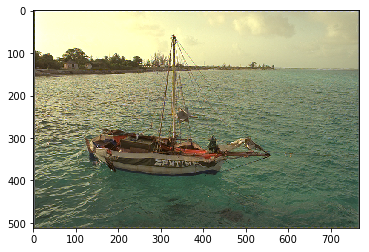

In [5]:
im_color = np.zeros(shape=(image.shape[0], image.shape[1], 3))

for y in range(0, image.shape[0]):
    for x in range(0, image.shape[1]):
        if y % 2 == 0:
            if x % 2 == 0:
                # R
                alpha = np.fabs((getC(image, y, x - 2) + getC(image, y, x + 2)) / 2 - getC(image, y, x))
                beta = np.fabs((getC(image, y - 2, x) + getC(image, y + 2, x)) / 2 - getC(image, y, x))

                im_color[y, x, 0] = getC(image, y, x)
                if alpha < beta:
                    im_color[y, x, 1] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
                elif alpha > beta:
                    im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x)) / 2
                else:
                    im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4
                im_color[y, x, 2] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4
            else:
                # G
                im_color[y, x, 0] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
        else:
            if x % 2 == 0:
                # G
                im_color[y, x, 0] = (getC(image, y + 1, x) + getC(image, y - 1, x)) / 2
                im_color[y, x, 1] = getC(image, y, x)
                im_color[y, x, 2] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
            else:
                # B
                im_color[y, x, 0] = (getC(image, y - 1, x - 1) + getC(image, y + 1, x - 1) + getC(image, y + 1, x + 1) + getC(image, y - 1, x + 1)) / 4

                alpha = np.fabs((getC(image, y, x - 2) + getC(image, y, x + 2)) / 2 - getC(image, y, x))
                beta = np.fabs((getC(image, y - 2, x) + getC(image, y + 2, x)) / 2 - getC(image, y, x))

                if alpha < beta:
                    im_color[y, x, 1] = (getC(image, y, x - 1) + getC(image, y, x + 1)) / 2
                elif alpha > beta:
                    im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x)) / 2
                else:
                    im_color[y, x, 1] = (getC(image, y - 1, x) + getC(image, y + 1, x) + getC(image, y, x - 1) + getC(image, y, x + 1)) / 4

                im_color[y, x, 2] = getC(image, y, x)

for y in range(0, image.shape[0]):
    for x in range(0, image.shape[1]):
        if y % 2 == 0:
            if x % 2 == 0:
                # R
                im_color[y, x, 2] -= (getC(im_color, y - 1, x - 1)[1] + getC(im_color, y - 1, x + 1)[1] + getC(im_color, y + 1, x - 1)[1] + getC(im_color, y + 1, x + 1)[1] - getC(im_color, y, x)[1] * 4) / 4
            else:
                # G
                im_color[y, x, 0] -= (getC(im_color, y, x + 1)[1] - getC(im_color, y, x)[1] * 2 + getC(im_color, y, x - 1)[1]) / 2

                im_color[y, x, 2] -= (getC(im_color, y, x + 1)[1] - getC(im_color, y, x)[1] * 2 + getC(im_color, y, x - 1)[1]) / 2
        else:
            if x % 2 == 0:
                # G
                im_color[y, x, 0] -= (getC(im_color, y + 1, x)[1] - getC(im_color, y, x)[1] * 2 + getC(im_color, y - 1, x)[1]) / 2

                im_color[y, x, 2] -= (getC(im_color, y + 1, x)[1] - getC(im_color, y, x)[1] * 2 + getC(im_color, y - 1, x)[1]) / 2
            else:
                # B
                im_color[y, x, 0] -= (getC(im_color, y - 1, x - 1)[1] + getC(im_color, y - 1, x + 1)[1] + getC(im_color, y + 1, x - 1)[1] + getC(im_color, y + 1, x + 1)[1] - getC(im_color, y, x)[1] * 4) / 4

plt.imshow(im_color)

In [6]:
snr = calcPSNR(imref, im_color)
print("PSNR=", snr[0], "dB  MSE=", snr[1])

PSNR= 30.157016010625437 dB  MSE= 0.0009644914874508436
